In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('salary.csv')

In [3]:
df.dropna()
df_train, df_test = train_test_split(df, test_size=0.3, random_state=9)

#### 1. Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

/home/umuzi/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/umuzi/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'years abs')

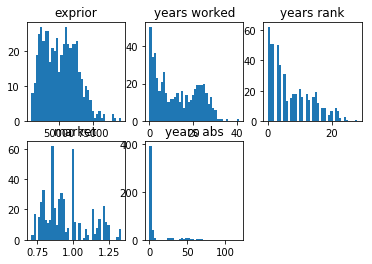

In [4]:
plt.subplot(2,3,1)
plt.hist(df['salary'], bins=40)
plt.title('exprior')

plt.subplot(2,3,2)
plt.hist(df['yearsworked'], bins=40)
plt.title('years worked')

plt.subplot(2,3,3)
plt.hist(df['yearsrank'], bins=40)
plt.title('years rank')
          
plt.subplot(2,3,4)
plt.hist(df['market'], bins=40)
plt.title('market')

plt.subplot(2,3,5)
plt.hist(df['yearsabs'], bins=40)
plt.title('years abs')

In [5]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


Text(0.5, 1.0, 'salary')

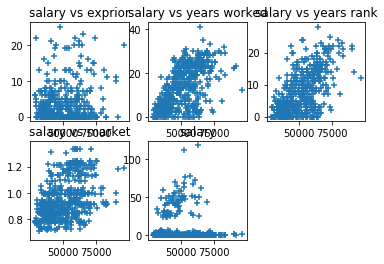

In [6]:
plt.subplot(2,3,1)
plt.scatter(x = df['salary'], y= df['exprior'], marker='+')
plt.title('salary vs exprior')


plt.subplot(2,3,2)
plt.scatter(x = df['salary'], y= df['yearsworked'], marker='+')
plt.title('salary vs years worked')

plt.subplot(2,3,3)
plt.scatter(x = df['salary'], y= df['yearsrank'], marker='+')
plt.title('salary vs years rank')
          
plt.subplot(2,3,4)
plt.scatter(x = df['salary'], y= df['market'], marker='+')
plt.title('salary vs market')

plt.subplot(2,3,5)
plt.scatter(x = df['salary'], y= df['yearsabs'], marker='+')
plt.title('salary')

#### 2. One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [7]:
#define categorical values
cat_columns = ["Field"]

#### 3.Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

None

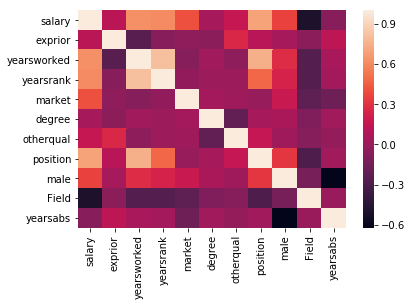

In [8]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#### 4. Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [9]:
model = smf.ols(formula='salary ~ yearsworked + yearsrank + market + yearsabs', data=df_train).fit()
model.params

Intercept       5684.047724
yearsworked      585.359805
yearsrank        522.179618
market         35951.340296
yearsabs         -30.614436
dtype: float64

#### 5. Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

In [36]:
predictions = model.predict()
residuals = model.resid
print('predictions:', predictions.shape,'\nresiduals:', residuals.shape)


predictions: (358,) 
residuals: (358,)


#### 6.     Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.
#### Are there any problems with the regression?
#### Now run your model on the test set.

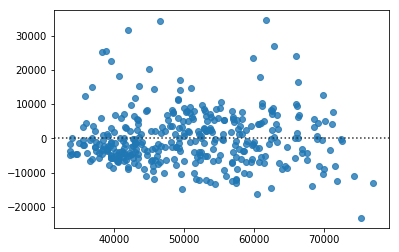

In [37]:
sns.residplot(predictions, residuals, lo)

#### 7. How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?